### Feature Engineering

- model hanya sebagus dengan data yg kita pakai

In [102]:
import pandas as pd
import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer




In [5]:
df = sns.load_dataset('tips')
df

#total bill, tips nya berapa, siapa yg bayar ? male / female, perokok atau tidak, hari apa , waktu dinner / apa , berapa orangnya

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Teknik Feature Engineering

Tutorial 1 :

data : tips

target : tip

preprocess:
1. one hot encoding : sex, smoker, time
2. binary encoding : day
3. robust scaler : total_bill
4. no treatment : size
Random state 10, data splitting 70:30 model Ridge default

### 1. One hot Encoding

In [25]:
enc_df = pd.get_dummies(df[['sex', 'smoker', 'time', 'day']], drop_first=True)
enc_df

,sex_Female,smoker_No,time_Dinner,day_Fri,day_Sat,day_Sun
0,True,True,True,False,False,True
1,False,True,True,False,False,True
2,False,True,True,False,False,True
3,False,True,True,False,False,True
4,True,True,True,False,False,True
...,...,...,...,...,...,...
239,False,True,True,False,True,False
240,True,False,True,False,True,False
241,False,False,True,False,True,False
242,False,True,True,False,True,False


In [16]:
#gabungin datanya
clean_df = pd.concat([df[['total_bill', 'tip', 'size']], enc_df], axis=1)
clean_df

,total_bill,tip,size,sex_Female,smoker_No,time_Dinner,day_Fri,day_Sat,day_Sun
0,16.99,1.01,2,True,True,True,False,False,True
1,10.34,1.66,3,False,True,True,False,False,True
2,21.01,3.50,3,False,True,True,False,False,True
3,23.68,3.31,2,False,True,True,False,False,True
4,24.59,3.61,4,True,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,False,True,True,False,True,False
240,27.18,2.00,2,True,False,True,False,True,False
241,22.67,2.00,2,False,False,True,False,True,False
242,17.82,1.75,2,False,True,True,False,True,False


In [17]:
X = clean_df.drop(columns='tip')
y = clean_df['tip']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
rb = RobustScaler()
rb.fit(X_train[['total_bill']])

RobustScaler()

### Robust Scaler 
Contoh Penggunaan:

Data asli: 160, 162, 161, 190, 159

Data setelah di-scaled dengan Robust Scaler: -0.5, 0.0, -0.25, 3.0, -0.75

Seperti yang terlihat, outlier 190 masih ada di data, tapi tidak terlalu mempengaruhi nilai data yang lain.

Kesimpulan:

Robust Scaler berguna untuk menjaga agar data tetap proporsional meskipun ada outliers, sehingga model machine learning bisa bekerja lebih baik tanpa terlalu dipengaruhi oleh nilai-nilai ekstrem tersebut.

In [20]:
X_train['total_bill'] = rb.transform(X_train[['total_bill']])
X_test['total_bill'] = rb.transform(X_test[['total_bill']])

In [21]:
X_train

,total_bill,size,sex_Female,smoker_No,time_Dinner,day_Fri,day_Sat,day_Sun
18,-0.029333,3,True,True,True,False,False,True
96,0.887111,2,False,False,True,True,False,False
172,-0.893333,2,False,False,True,False,False,True
106,0.283556,2,False,False,True,False,True,False
69,-0.203556,2,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...
229,0.428444,2,True,False,True,False,True,False
12,-0.167111,2,False,True,True,False,False,True
168,-0.596444,2,True,False,True,False,True,False
222,-0.775111,1,False,False,False,True,False,False


In [22]:
X_train.describe()

,total_bill,size
count,1.700000e+02,170.000000
mean,2.159895e-01,2.511765
std,7.784959e-01,0.949857
min,-1.264889e+00,1.000000
25%,-3.448889e-01,2.000000
50%,1.578598e-16,2.000000
75%,6.551111e-01,3.000000
max,2.758222e+00,6.000000


In [23]:
X_test.describe()

,total_bill,size
count,74.000000,74.000000
mean,0.232420,2.702703
std,0.825354,0.946945
min,-1.026667,1.000000
25%,-0.370000,2.000000
50%,0.081778,2.000000
75%,0.487333,3.000000
max,2.978667,6.000000


In [26]:
ridge = Ridge()

In [27]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [28]:
mean_squared_error(y_pred, y_test)

1.0851789685629334

### Latihan 1

data : tips

target : tip

preprocess v1:

1. one hot encoding : sex, smoker, time
2. ordinal encoding : day
3. no treatment : size, total_bill

Random state 10, data splitting 70:30 model

Tree(max depth 3)

In [33]:
#one hot encoding
enc_df2 = pd.get_dummies(df[['sex', 'smoker', 'time']], drop_first=True, dtype=bool)
enc_df2 = enc_df2.astype(int)
enc_df2

,sex_Female,smoker_No,time_Dinner
0,1,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,1,1,1
...,...,...,...
239,0,1,1
240,1,0,1
241,0,0,1
242,0,1,1


In [38]:
#ordinal encoding
encoder = OrdinalEncoder(categories=[['Thur', 'Fri', 'Sat', 'Sun']])

# Fit dan transform kolom 'day' dengan OrdinalEncoder
df['day_encoded'] = encoder.fit_transform(df[['day']])



- Thur = 0
- Fri = 1
- Sat = 2
- Sun = 3

In [40]:
#gabungin data
clean_df2 = pd.concat([df[['total_bill', 'tip', 'size']], enc_df2,df['day_encoded']], axis = 1)
clean_df2

,total_bill,tip,size,sex_Female,smoker_No,time_Dinner,day_encoded
0,16.99,1.01,2,1,1,1,3.0
1,10.34,1.66,3,0,1,1,3.0
2,21.01,3.50,3,0,1,1,3.0
3,23.68,3.31,2,0,1,1,3.0
4,24.59,3.61,4,1,1,1,3.0
...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,2.0
240,27.18,2.00,2,1,0,1,2.0
241,22.67,2.00,2,0,0,1,2.0
242,17.82,1.75,2,0,1,1,2.0


In [41]:
X = clean_df2.drop(columns='tip')
y = clean_df['tip']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [44]:
# Buat model DecisionTreeRegressor dengan max_depth = 3
regressor = DecisionTreeRegressor(max_depth=3)

In [45]:
# Latih model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [46]:
# Evaluasi model
score = regressor.score(X_test, y_test)
print(f"R-squared: {score:.2f}")

R-squared: 0.51


In [47]:
mean_squared_error(y_pred, y_test)

1.9335459564752095

### 2. Missing Values

In [48]:
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Latihan Missing Value
1. encode origin pakai one hot encoding
2. cek missing value, handling kalau ada
3. cek outlier, handling kalau ada
4. scaling semua feature numerik
5. X -nya adalah semua kolom kecuali name
6. y-nya adalah mpg
7. pakai Ridge dan Linear Regression, compare hasil R2 score dan MSE

In [49]:
#one hot encoding
enc_mpg = pd.get_dummies(mpg[['origin']], drop_first=True, dtype=bool)
enc_mpg = enc_mpg.astype(int)
enc_mpg

,origin_japan,origin_usa
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
393,0,1
394,0,0
395,0,1
396,0,1


In [52]:
#check missing value
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [58]:
misssing_in_horsepower = mpg[mpg['horsepower'].isnull()]
print(misssing_in_horsepower)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl  


In [62]:
#isi value dengan KNN Imputer
knn_imputer = KNNImputer(n_neighbors=2)
mpg_horsepower_filled = pd.DataFrame(knn_imputer.fit_transform(mpg[['horsepower']]), columns=['horsepower'])

print(mpg_horsepower_filled)

     horsepower
0         130.0
1         165.0
2         150.0
3         150.0
4         140.0
..          ...
393        86.0
394        52.0
395        84.0
396        79.0
397        82.0

[398 rows x 1 columns]


In [82]:
mpg[['horsepower']] = knn_imputer.fit_transform(mpg[['horsepower']])

In [65]:
# Menentukan fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Cek outliers pada kolom 'mpg' (miles per gallon)
outliers_mpg = detect_outliers_iqr(mpg, 'mpg')
print(outliers_mpg)


      mpg  cylinders  displacement  horsepower  weight  acceleration  \
322  46.6          4          86.0        65.0    2110          17.9   

     model_year origin       name  
322          80  japan  mazda glc  


In [135]:
#check outlier
mpg.info()
# Pisahkan kolom numerik dan kategorikal
numeric_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
categorical_columns = mpg.select_dtypes(include=['object', 'category']).columns

mpg[numeric_columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    float64
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(7), object(2)
memory usage: 28.1+ KB


,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1.498191,1.090604,2.474042,0.630870,-1.451420,-1.627426
1,1.498191,1.503514,0.293769,0.854333,-1.662462,-1.627426
2,1.498191,1.196232,0.293769,0.550470,-1.873504,-1.627426
3,1.498191,1.061796,0.293769,0.546923,-1.451420,-1.627426
4,1.498191,1.042591,0.293769,0.565841,-2.084547,-1.627426
...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.154232,-0.213324,0.068085,1.621983
394,-0.856321,-0.925936,-2.185171,-0.993671,0.025877,1.621983
395,-0.856321,-0.561039,-0.273699,-0.798585,-1.620254,1.621983
396,-0.856321,-0.705077,-0.572367,-0.408411,1.334339,1.621983


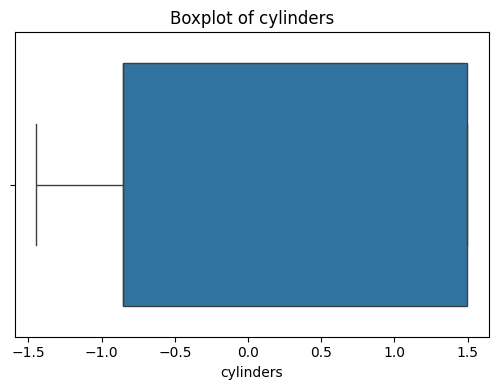

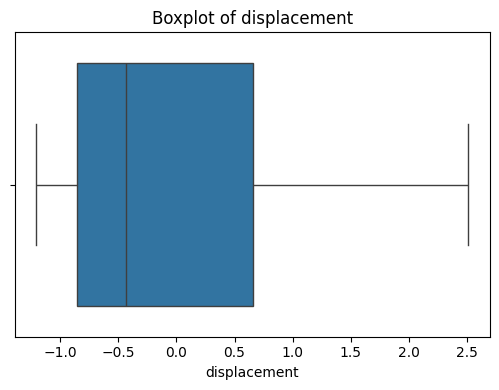

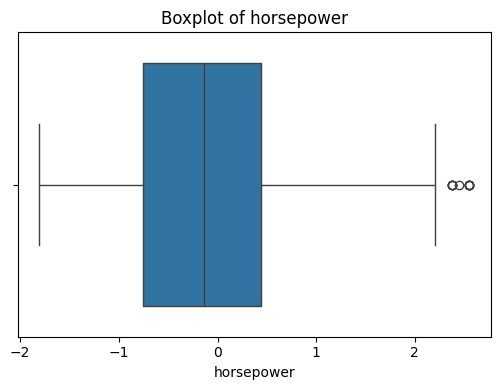

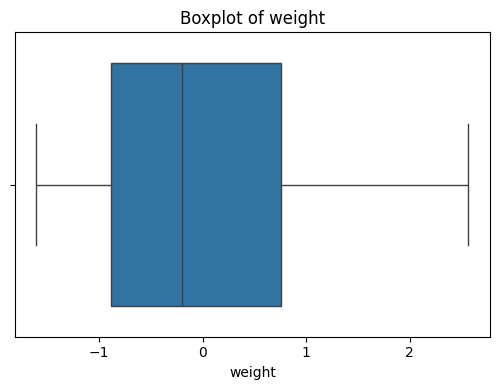

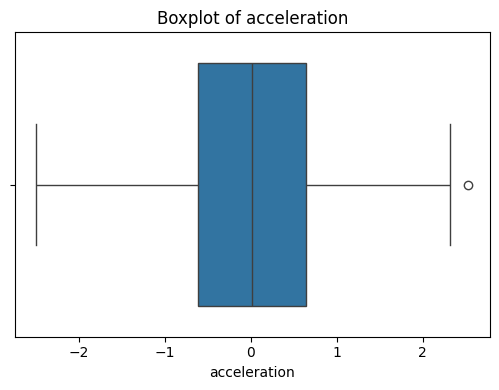

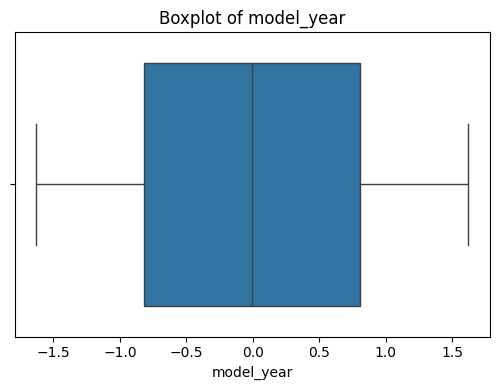

In [113]:
# Visualisasi kolom numerik (Histogram dan Boxplot)
for column in numeric_columns:
    plt.figure(figsize=(10, 4))
    # Plot Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=mpg[column])
    plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()


In [124]:

# Daftar kolom yang akan dicek outliers dan diganti dengan median
columns_to_check = ['horsepower', 'acceleration']

# Fungsi untuk mengganti outliers dengan median menggunakan IQR
def replace_outliers_with_median(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        median_value = df[column].median()
        
        # Ganti outliers dengan median
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])
    
    return df

# Terapkan fungsi untuk mengganti outliers di beberapa kolom
df_cleaned = replace_outliers_with_median(mpg, columns_to_check)

# Tampilkan dataset yang sudah diperbaiki
print(df_cleaned[columns_to_check].head())


   horsepower  acceleration
0    1.321179     -1.451420
1   -0.077725     -1.662462
2   -0.077725     -1.873504
3   -0.077725     -1.451420
4    1.704441     -2.084547


In [136]:
mpg = replace_outliers_with_median(mpg, columns_to_check)

In [137]:
#scalling semua feature numerik
scaler = StandardScaler()


In [138]:

mpg[numeric_columns] = scaler.fit_transform(mpg[numeric_columns])
mpg[numeric_columns].head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1.498191,1.090604,0.398013,0.630870,-1.451420,-1.627426
1,1.498191,1.503514,0.398013,0.854333,-1.662462,-1.627426
2,1.498191,1.196232,0.398013,0.550470,-1.873504,-1.627426
3,1.498191,1.061796,0.398013,0.546923,-1.451420,-1.627426
4,1.498191,1.042591,0.398013,0.565841,-2.084547,-1.627426


In [139]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    float64
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(7), object(2)
memory usage: 28.1+ KB


In [129]:
X = mpg.drop(columns=['name', 'mpg', 'origin'])
X = pd.concat([X, enc_mpg], axis = 1)
y = mpg['mpg']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [131]:
#pakai ridge
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
print("MSE : ", mse)
print("R2 : ", r2)

MSE :  0.14797929576491692
R2 :  0.8436309784104883


In [132]:
#pakai linear Regression
from sklearn.linear_model import LinearRegression
ModelLinearRegression = LinearRegression()
ModelLinearRegression.fit(X_train, y_train)


LinearRegression()

In [133]:
y_pred = ModelLinearRegression.predict(X_test)
mse_lin = mean_squared_error(y_pred, y_test)
r2_lin = r2_score(y_test, y_pred)
print("MSE : ", mse_lin)
print("R2 : ", r2_lin)

MSE :  0.15247593472062873
R2 :  0.8388794013043034
